
# 📘 M3.2 Pandas 分組與聚合進階應用

本教學將深入探討 Pandas 中 `groupby()` 操作的進階應用與聚合函數的多種用法。
分組與聚合是數據分析中的核心操作，掌握這些進階技巧可以讓您更高效地從複雜數據中提取洞察。


## 🎯 教學目標

- 🔍 深入理解 groupby() 操作的內部機制與優化
- 🔄 掌握多種聚合方法與函數的綜合應用
- 📊 學習創建與使用複雜的自定義聚合函數
- 🧮 理解分組轉換與過濾的高級技巧
- 🛠️ 運用分組操作解決實際業務問題


## 🧰 1. 環境設置

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial

# 設置中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 用來正常顯示負號


# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)

In [53]:

## 📊 2. GroupBy 進階操作

In [54]:
# 創建較複雜的示例數據集
np.random.seed(42)
n_rows = 1000

# 產品資料
products = pd.DataFrame({
    'ProductID': range(1, 101),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books', 'Home'], 100),
    'Supplier': np.random.choice(['SupplierA', 'SupplierB', 'SupplierC', 'SupplierD'], 100),
    'Price': np.random.uniform(10, 1000, 100).round(2),
    'Stock': np.random.randint(0, 100, 100)
})

# 銷售資料
sales = pd.DataFrame({
    'SaleID': range(1, n_rows + 1),
    'Date': pd.date_range(start='2023-01-01', periods=n_rows),
    'ProductID': np.random.choice(products['ProductID'], n_rows),
    'Quantity': np.random.randint(1, 10, n_rows),
    'CustomerID': np.random.randint(1, 21, n_rows),
    'StoreID': np.random.choice(['Store1', 'Store2', 'Store3', 'Store4'], n_rows),
    'Discount': np.random.choice([0, 0.05, 0.1, 0.15, 0.2], n_rows),
})

# 合併產品與銷售資料
sales_data = pd.merge(sales, products, on='ProductID')

# 計算每筆銷售的總金額
sales_data['TotalAmount'] = sales_data['Quantity'] * sales_data['Price'] * (1 - sales_data['Discount'])

print("銷售資料預覽:")
print(sales_data.head())
print(f"\n資料集維度: {sales_data.shape}")

銷售資料預覽:
   SaleID       Date  ProductID  Quantity  CustomerID StoreID  Discount     Category   Supplier  \
0       1 2023-01-01         42         2          10  Store1      0.05  Electronics  SupplierC   
1       2 2023-01-02         70         7           6  Store2      0.05        Books  SupplierA   
2       3 2023-01-03         15         5          15  Store3      0.05        Books  SupplierD   
3       4 2023-01-04         54         6          16  Store2      0.10         Home  SupplierA   
4       5 2023-01-05         60         2          17  Store1      0.15     Clothing  SupplierD   

    Price  Stock  TotalAmount  
0  228.04     94       433.28  
1  410.46     59      2729.56  
2  156.61     63       743.90  
3  546.03      1      2948.56  
4  268.22     47       455.97  

資料集維度: (1000, 12)



### 2.1 GroupBy 對象的深入理解

In [55]:
# 創建 GroupBy 對象並查看其結構
store_group = sales_data.groupby('StoreID')
print("GroupBy 對象類型:", type(store_group))
print("GroupBy 對象包含的群組:", list(store_group.groups.keys()))
print("第一個群組的索引:", list(store_group.groups['Store1'])[:5], "...")

# 使用 get_group() 方法獲取特定群組
store1_data = store_group.get_group('Store1')
print("\nStore1的資料 (前5行):")
print(store1_data.head())

GroupBy 對象類型: <class 'pandas.core.groupby.generic.DataFrameGroupBy'>
GroupBy 對象包含的群組: ['Store1', 'Store2', 'Store3', 'Store4']
第一個群組的索引: [0, 4, 5, 8, 14] ...

Store1的資料 (前5行):
    SaleID       Date  ProductID  Quantity  CustomerID StoreID  Discount     Category   Supplier  \
0        1 2023-01-01         42         2          10  Store1      0.05  Electronics  SupplierC   
4        5 2023-01-05         60         2          17  Store1      0.15     Clothing  SupplierD   
5        6 2023-01-06         97         5           8  Store1      0.10         Home  SupplierC   
8        9 2023-01-09         60         6           2  Store1      0.05     Clothing  SupplierD   
14      15 2023-01-15         47         7           4  Store1      0.00     Clothing  SupplierA   

     Price  Stock  TotalAmount  
0   228.04     94       433.28  
4   268.22     47       455.97  
5   593.97     57      2672.87  
8   268.22     47      1528.85  
14  941.12     23      6587.84  


In [56]:
# 查看 GroupBy 對象的組成
# 使用 for 循環遍歷群組
print("遍歷群組 (僅顯示每個群組的前2行):")
for name, group in store_group:
    print(f"\n{name} 群組:")
    print(group.head(2))
    if name == 'Store2':  # 只顯示部分群組作為示例
        break

遍歷群組 (僅顯示每個群組的前2行):

Store1 群組:
   SaleID       Date  ProductID  Quantity  CustomerID StoreID  Discount     Category   Supplier  \
0       1 2023-01-01         42         2          10  Store1      0.05  Electronics  SupplierC   
4       5 2023-01-05         60         2          17  Store1      0.15     Clothing  SupplierD   

    Price  Stock  TotalAmount  
0  228.04     94       433.28  
4  268.22     47       455.97  

Store2 群組:
   SaleID       Date  ProductID  Quantity  CustomerID StoreID  Discount Category   Supplier  \
1       2 2023-01-02         70         7           6  Store2      0.05    Books  SupplierA   
3       4 2023-01-04         54         6          16  Store2      0.10     Home  SupplierA   

    Price  Stock  TotalAmount  
1  410.46     59      2729.56  
3  546.03      1      2948.56  



### 2.2 多種聚合函數的組合應用

In [57]:
# 基本聚合操作的進階用法
store_category_summary = sales_data.groupby(['StoreID', 'Category']).agg({
    'TotalAmount': ['sum', 'mean', 'count', 'median', 'std'],
    'Quantity': ['sum', 'mean', 'max'],
    'Discount': ['mean', 'max']
})

print("多級分組與多種聚合函數組合:")
print(store_category_summary)

多級分組與多種聚合函數組合:
                    TotalAmount                                  Quantity           Discount     
                            sum     mean count   median      std      sum  mean max     mean  max
StoreID Category                                                                                 
Store1  Books         218542.24  2801.82    78  2013.48  2093.79      418  5.36   9     0.10  0.2
        Clothing      172552.50  2783.10    62  2351.95  2081.05      281  4.53   9     0.11  0.2
        Electronics    59370.34  1263.20    47   888.39  1100.98      198  4.21   9     0.09  0.2
        Food           93795.36  2344.88    40  2269.89  1604.15      179  4.47   9     0.10  0.2
        Home          129591.33  2879.81    45  2449.90  2154.37      225  5.00   9     0.09  0.2
...                         ...      ...   ...      ...      ...      ...   ...  ..      ...  ...
Store4  Books         143143.40  2426.16    59  1902.40  1910.77      305  5.17   9     0.09  0.2
     

In [58]:
# 改進結果格式，展平多級列名
store_category_flat = store_category_summary.reset_index()
store_category_flat.columns = ['_'.join(col).strip('_') for col in store_category_flat.columns.values]
print("展平後的多級分組結果:")
print(store_category_flat.head())

展平後的多級分組結果:
  StoreID     Category  TotalAmount_sum  TotalAmount_mean  TotalAmount_count  TotalAmount_median  \
0  Store1        Books        218542.24           2801.82                 78             2013.48   
1  Store1     Clothing        172552.50           2783.10                 62             2351.95   
2  Store1  Electronics         59370.34           1263.20                 47              888.39   
3  Store1         Food         93795.36           2344.88                 40             2269.89   
4  Store1         Home        129591.33           2879.81                 45             2449.90   

   TotalAmount_std  Quantity_sum  Quantity_mean  Quantity_max  Discount_mean  Discount_max  
0          2093.79           418           5.36             9           0.10           0.2  
1          2081.05           281           4.53             9           0.11           0.2  
2          1100.98           198           4.21             9           0.09           0.2  
3          1604

In [59]:
# 使用 named aggregation (Pandas 0.25+)
named_agg = sales_data.groupby(['StoreID', 'Category']).agg(
    total_sales=('TotalAmount', 'sum'),
    avg_sales=('TotalAmount', 'mean'),
    sales_count=('TotalAmount', 'count'),
    total_quantity=('Quantity', 'sum'),
    avg_quantity=('Quantity', 'mean'),
    avg_discount=('Discount', 'mean')
)

print("使用命名聚合的結果:")
print(named_agg.head())

使用命名聚合的結果:
                     total_sales  avg_sales  sales_count  total_quantity  avg_quantity  \
StoreID Category                                                                         
Store1  Books          218542.24    2801.82           78             418          5.36   
        Clothing       172552.50    2783.10           62             281          4.53   
        Electronics     59370.34    1263.20           47             198          4.21   
        Food            93795.36    2344.88           40             179          4.47   
        Home           129591.33    2879.81           45             225          5.00   

                     avg_discount  
StoreID Category                   
Store1  Books                0.10  
        Clothing             0.11  
        Electronics          0.09  
        Food                 0.10  
        Home                 0.09  



### 2.3 高級自定義聚合函數

In [60]:
# 定義複雜自定義聚合函數
def weighted_avg(group, value_col, weight_col):
    """Calculate weighted average."""
    return (group[value_col] * group[weight_col]).sum() / group[weight_col].sum()

# Create partial function for weighted price
weighted_price = partial(weighted_avg, value_col='Price', weight_col='Quantity')
weighted_discount = partial(weighted_avg, value_col='Discount', weight_col='TotalAmount')

# Apply the custom function using groupby and apply
grouped = sales_data.groupby('Category').apply(lambda x: pd.Series({
    'WeightedPrice': weighted_price(x),
    'WeightedDiscount': weighted_discount(x)
})).reset_index()

print("使用 apply 的加權價格結果:")
print(grouped)

使用 apply 的加權價格結果:
      Category  WeightedPrice  WeightedDiscount
0        Books         544.78              0.09
1     Clothing         662.20              0.10
2  Electronics         404.88              0.10
3         Food         528.00              0.10
4         Home         570.16              0.10


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\1714491148.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = sales_data.groupby('Category').apply(lambda x: pd.Series({


In [61]:
# 檢查 sales_data 的列名
print("DataFrame 列名:")
print(sales_data.columns)

# 打印前幾行數據以確認數據的完整性
print("\nDataFrame 前幾行數據:")
print(sales_data.head())

DataFrame 列名:
Index(['SaleID', 'Date', 'ProductID', 'Quantity', 'CustomerID', 'StoreID', 'Discount', 'Category',
       'Supplier', 'Price', 'Stock', 'TotalAmount'],
      dtype='object')

DataFrame 前幾行數據:
   SaleID       Date  ProductID  Quantity  CustomerID StoreID  Discount     Category   Supplier  \
0       1 2023-01-01         42         2          10  Store1      0.05  Electronics  SupplierC   
1       2 2023-01-02         70         7           6  Store2      0.05        Books  SupplierA   
2       3 2023-01-03         15         5          15  Store3      0.05        Books  SupplierD   
3       4 2023-01-04         54         6          16  Store2      0.10         Home  SupplierA   
4       5 2023-01-05         60         2          17  Store1      0.15     Clothing  SupplierD   

    Price  Stock  TotalAmount  
0  228.04     94       433.28  
1  410.46     59      2729.56  
2  156.61     63       743.90  
3  546.03      1      2948.56  
4  268.22     47       455.97  


In [62]:
# 使用裝飾器定義自定義聚合函數 (更具可讀性的方式)
from pandas.api.extensions import register_series_accessor

@register_series_accessor("custom_stats")
class CustomStats:
    def __init__(self, series):
        self._series = series
        
    def top_n_mean(self, n=3):
        """計算前n個最大值的平均值"""
        return self._series.nlargest(n).mean()
    
    def excludes_extremes_mean(self):
        """計算排除最大值和最小值後的平均值"""
        s = self._series.sort_values()
        return s.iloc[1:-1].mean()

# 測試自定義統計方法
print("客製化Series統計方法:")
price_series = sales_data['Price']
print(f"前3個最大價格的平均值: {price_series.custom_stats.top_n_mean(3):.2f}")
print(f"排除極值後的平均價格: {price_series.custom_stats.excludes_extremes_mean():.2f}")

客製化Series統計方法:
前3個最大價格的平均值: 997.76
排除極值後的平均價格: 548.57


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\2676925532.py:4: UserWarning: registration of accessor <class '__main__.CustomStats'> under name 'custom_stats' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  @register_series_accessor("custom_stats")


In [63]:
# 使用 lambda 函數進行複雜聚合操作
advanced_stats = sales_data.groupby('Category').agg({
    'TotalAmount': [
        'sum', 
        'mean',
        ('above_avg_count', lambda x: (x > x.mean()).sum()),
        ('pct_above_500', lambda x: (x > 500).mean() * 100)
    ],
    'Price': [
        'mean',
        ('price_range', lambda x: x.max() - x.min()),
        ('price_95pct', lambda x: x.quantile(0.95))
    ],
    'Quantity': [
        'sum',
        ('median_qty', 'median'),
        ('mode_qty', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    ]
})

print("使用 lambda 函數的進階統計結果:")
print(advanced_stats)

使用 lambda 函數的進階統計結果:
            TotalAmount                                          Price                          \
                    sum     mean above_avg_count pct_above_500    mean price_range price_95pct   
Category                                                                                         
Books         671124.99  2532.55             108         87.92  542.89      940.87      981.66   
Clothing      582736.14  2856.55              92         92.65  671.25      907.72      997.76   
Electronics   309812.60  1760.30              72         76.14  411.82      879.15      893.43   
Food          397173.07  2421.79              77         90.24  529.02      659.06      816.30   
Home          467443.10  2447.35              78         89.01  567.86      920.27      976.85   

            Quantity                      
                 sum median_qty mode_qty  
Category                                  
Books           1355        5.0        9  
Clothing         981  


### 2.4 分組轉換與應用 (Transform & Apply)

In [64]:
# 使用 transform 進行組內標準化
# 計算每個類別中產品價格的 z-score
sales_data['Price_ZScore'] = sales_data.groupby('Category')['Price'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# 計算每個門店銷售額相對於該門店平均值的百分比
sales_data['SalesVsStoreAvg'] = sales_data.groupby('StoreID')['TotalAmount'].transform(
    lambda x: x / x.mean() * 100
)

print("使用 transform 進行數據轉換的結果:")
print(sales_data[['ProductID', 'Category', 'Price', 'Price_ZScore', 
                 'StoreID', 'TotalAmount', 'SalesVsStoreAvg']].head(10))

使用 transform 進行數據轉換的結果:
   ProductID     Category   Price  Price_ZScore StoreID  TotalAmount  SalesVsStoreAvg
0         42  Electronics  228.04         -0.81  Store1       433.28            17.49
1         70        Books  410.46         -0.47  Store2      2729.56           117.76
2         15        Books  156.61         -1.38  Store3       743.90            28.61
3         54         Home  546.03         -0.09  Store2      2948.56           127.20
4         60     Clothing  268.22         -1.42  Store1       455.97            18.41
5         97         Home  593.97          0.11  Store1      2672.87           107.89
6          8         Food  562.52          0.17  Store4      1800.06            77.90
7         53        Books  216.98         -1.16  Store3      1757.54            67.60
8         60     Clothing  268.22         -1.42  Store1      1528.85            61.71
9          5         Home  251.68         -1.29  Store4       503.36            21.78


In [65]:
# 使用 transform 計算累計和移動統計量
# 按門店和日期分組，計算每個門店的累計銷售額
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data['Month'] = sales_data['Date'].dt.to_period('M')

# 計算每個門店每月累計銷售額
sales_data['CumulativeStoreSales'] = sales_data.sort_values('Date').groupby(['StoreID', 'Month'])['TotalAmount'].transform(
    lambda x: x.cumsum()
)

# 計算每個產品類別的3天移動平均銷售額
sales_data['MovingAvgCategorySales'] = sales_data.sort_values('Date').groupby(['Category', 'Date'])['TotalAmount'].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)

print("累計和移動統計結果:")
print(sales_data[['Date', 'Month', 'StoreID', 'Category', 'TotalAmount', 
                 'CumulativeStoreSales', 'MovingAvgCategorySales']].sort_values(['StoreID', 'Date']).head(10))

累計和移動統計結果:
         Date    Month StoreID     Category  TotalAmount  CumulativeStoreSales  \
0  2023-01-01  2023-01  Store1  Electronics       433.28                433.28   
4  2023-01-05  2023-01  Store1     Clothing       455.97                889.25   
5  2023-01-06  2023-01  Store1         Home      2672.87               3562.12   
8  2023-01-09  2023-01  Store1     Clothing      1528.85               5090.97   
14 2023-01-15  2023-01  Store1     Clothing      6587.84              11678.81   
15 2023-01-16  2023-01  Store1     Clothing      1967.48              13646.29   
17 2023-01-18  2023-01  Store1     Clothing      4298.90              17945.19   
18 2023-01-19  2023-01  Store1        Books      6640.74              24585.93   
19 2023-01-20  2023-01  Store1     Clothing      5088.58              29674.50   
23 2023-01-24  2023-01  Store1        Books      1370.55              31045.05   

    MovingAvgCategorySales  
0                   433.28  
4                   455.97  

In [66]:
# 使用 apply 進行更複雜的組內操作
# 找出每個類別中銷售額最高的前3個產品
top_products = sales_data.groupby('Category').apply(
    lambda x: x.nlargest(3, 'TotalAmount')
).reset_index(drop=True)

print("每個類別銷售額最高的前3個產品:")
print(top_products[['Category', 'ProductID', 'TotalAmount']])

每個類別銷售額最高的前3個產品:
       Category  ProductID  TotalAmount
0         Books         79      8765.37
1         Books         62      8691.93
2         Books         62      8691.93
3      Clothing         47      8470.08
4      Clothing         61      7970.32
5      Clothing         47      7623.07
6   Electronics        100      8163.36
7   Electronics         71      6800.01
8   Electronics        100      6349.28
9          Food         90      6384.54
10         Food         90      6384.54
11         Food         90      6384.54
12         Home         84      8950.59
13         Home         18      8791.65
14         Home         84      8503.06


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\1782940226.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = sales_data.groupby('Category').apply(


In [67]:
# 使用 apply 計算每個類別的銷售趨勢
category_trend = sales_data.groupby('Category').apply(
    lambda group: pd.Series({
        'SalesGrowth': (group['TotalAmount'].iloc[-30:].mean() / 
                        group['TotalAmount'].iloc[:30].mean() - 1) * 100,
        'QuantityGrowth': (group['Quantity'].iloc[-30:].sum() / 
                          group['Quantity'].iloc[:30].sum() - 1) * 100,
        'IsGrowing': group['TotalAmount'].iloc[-30:].mean() > group['TotalAmount'].iloc[:30].mean()
    })
)

print("各類別銷售趨勢分析:")
print(category_trend)

各類別銷售趨勢分析:
             SalesGrowth  QuantityGrowth  IsGrowing
Category                                           
Books              -5.77           19.72      False
Clothing           -3.00           10.95      False
Electronics       -23.10          -10.14      False
Food              -16.52          -14.63      False
Home              -17.18           -6.25      False


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\1745862718.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_trend = sales_data.groupby('Category').apply(



### 2.5 分組過濾 (Filtering)

In [68]:
# 使用 filter 方法進行組級過濾
# 只保留平均銷售額超過300的類別
high_value_categories = sales_data.groupby('Category').filter(
    lambda x: x['TotalAmount'].mean() > 300
)

print("高價值類別 (平均銷售額 > 300):")
cat_names = high_value_categories['Category'].unique()
print(f"篩選後的類別: {', '.join(cat_names)}")
print(f"篩選前行數: {len(sales_data)}, 篩選後行數: {len(high_value_categories)}")

高價值類別 (平均銷售額 > 300):
篩選後的類別: Electronics, Books, Home, Clothing, Food
篩選前行數: 1000, 篩選後行數: 1000


In [69]:
# 複雜過濾：保留至少有100筆銷售且平均折扣率低於10%的店鋪
qualified_stores = sales_data.groupby('StoreID').filter(
    lambda x: (len(x) >= 100) & (x['Discount'].mean() < 0.1)
)

print("符合條件的店鋪:")
store_names = qualified_stores['StoreID'].unique()
print(f"篩選後的店鋪: {', '.join(store_names)}")
print(f"篩選前行數: {len(sales_data)}, 篩選後行數: {len(qualified_stores)}")

符合條件的店鋪:
篩選後的店鋪: Store1, Store2, Store3
篩選前行數: 1000, 篩選後行數: 751


In [70]:
# 組合過濾與聚合：找出產品類別中至少有3種產品且平均價格高於300的類別
price_threshold = 300
min_products = 3

# 步驟1：計算每個類別的獨特產品數量
product_counts = sales_data.groupby('Category')['ProductID'].nunique()
qualified_categories = product_counts[product_counts >= min_products].index

# 步驟2：計算每個類別的平均價格
avg_prices = sales_data.groupby('Category')['Price'].mean()
high_price_categories = avg_prices[avg_prices > price_threshold].index

# 步驟3：找出同時滿足兩個條件的類別
target_categories = set(qualified_categories) & set(high_price_categories)
print(f"符合條件的類別 (至少{min_products}個產品且平均價格 > {price_threshold}):")
print(target_categories)

# 步驟4：篩選出這些類別的資料
target_data = sales_data[sales_data['Category'].isin(target_categories)]
print(f"\n篩選後的資料預覽:")
print(target_data[['Category', 'ProductID', 'Price']].head())

符合條件的類別 (至少3個產品且平均價格 > 300):
{'Food', 'Electronics', 'Home', 'Clothing', 'Books'}

篩選後的資料預覽:
      Category  ProductID   Price
0  Electronics         42  228.04
1        Books         70  410.46
2        Books         15  156.61
3         Home         54  546.03
4     Clothing         60  268.22



## 📊 3. 實際案例：銷售數據多維度分析

In [71]:
# 創建時間維度
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Quarter'] = sales_data['Date'].dt.quarter
sales_data['Day'] = sales_data['Date'].dt.day_name()

# 1. 多維度銷售分析：按季度、門店和產品類別進行分組
multi_dim_analysis = sales_data.groupby(['Year', 'Quarter', 'StoreID', 'Category']).agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'Discount': 'mean'
}).round(2)

print("多維度銷售分析 (季度 x 門店 x 類別):")
print(multi_dim_analysis.head(8))

多維度銷售分析 (季度 x 門店 x 類別):
                                 TotalAmount                Quantity Discount
                                         sum     mean count      sum     mean
Year Quarter StoreID Category                                                
2023 1       Store1  Books          14805.63  1850.70     8       25     0.11
                     Clothing       38853.21  3885.32    10       56     0.10
                     Electronics     5419.32   903.22     6       16     0.08
                     Food            6649.89  1662.47     4       15     0.12
                     Home            2884.45  1442.22     2        8     0.08
             Store2  Books          19809.87  3301.65     6       39     0.09
                     Clothing        9445.98  3148.66     3       15     0.10
                     Electronics     5377.46  1792.49     3       18     0.20


月份與星期分析:
   Month        Day  total_sales  avg_sales  transactions  avg_quantity
0      1     Friday     34343.34    2641.80            13          5.92
1      1     Monday     29417.61    2101.26            14          4.79
2      1   Saturday     29923.30    2493.61            12          5.33
3      1     Sunday     28746.33    2211.26            13          4.77
4      1   Thursday     31151.26    2396.25            13          4.38
5      1    Tuesday     31160.17    2225.73            14          5.14
6      1  Wednesday     39489.72    2820.69            14          4.79
7      2     Friday     30416.83    2534.74            12          5.00
8      2     Monday     44501.97    3708.50            12          5.25
9      2   Saturday     27886.63    2323.89            12          4.75


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\2042079209.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='total_sales', data=time_analysis, estimator=sum, ci=None)


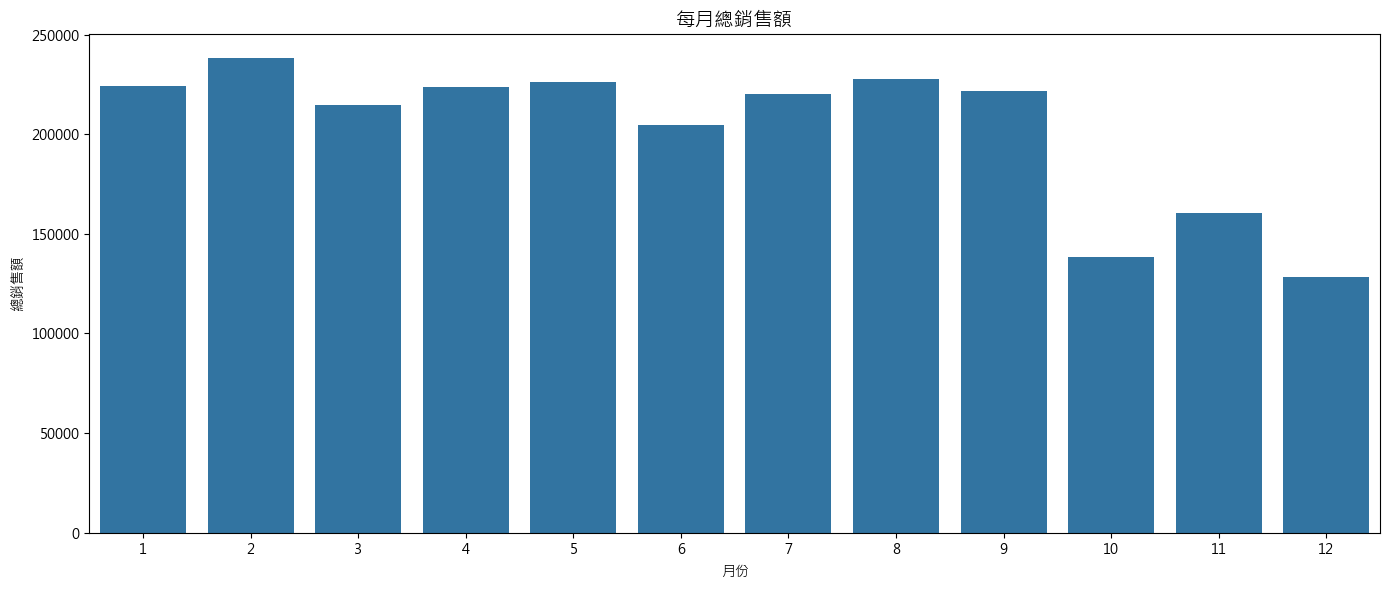

In [72]:
# 2. 時段分析：不同時間維度的銷售趨勢
time_analysis = sales_data.groupby(['Month', 'Day']).agg(
    total_sales=('TotalAmount', 'sum'),
    avg_sales=('TotalAmount', 'mean'),
    transactions=('SaleID', 'nunique'),
    avg_quantity=('Quantity', 'mean')
).reset_index()

print("月份與星期分析:")
print(time_analysis.head(10))

# 可視化月份銷售趨勢
plt.figure(figsize=(14, 6))
sns.barplot(x='Month', y='total_sales', data=time_analysis, estimator=sum, ci=None)
plt.title('每月總銷售額', fontsize=14)
plt.xlabel('月份')
plt.ylabel('總銷售額')
plt.tight_layout()
plt.show()

In [73]:
# 3. 客戶購買分析：研究每個客戶的購買行為
customer_analysis = sales_data.groupby('CustomerID').agg(
    total_spent=('TotalAmount', 'sum'),
    total_transactions=('SaleID', 'nunique'),
    avg_transaction_value=('TotalAmount', lambda x: x.sum() / len(x.unique())),
    first_purchase=('Date', 'min'),
    last_purchase=('Date', 'max'),
    favorite_category=('Category', lambda x: x.mode().iloc[0]),
    favorite_store=('StoreID', lambda x: x.mode().iloc[0]),
    product_variety=('ProductID', 'nunique')
)

# 計算客戶活躍期 (天數)
customer_analysis['active_days'] = (customer_analysis['last_purchase'] - 
                                   customer_analysis['first_purchase']).dt.days

print("客戶購買行為分析:")
print(customer_analysis.head())

客戶購買行為分析:
            total_spent  total_transactions  avg_transaction_value first_purchase last_purchase  \
CustomerID                                                                                        
1              87390.78                  42                2080.73     2023-03-13    2025-09-08   
2             120797.27                  52                2323.02     2023-01-09    2025-09-12   
3             153779.30                  57                2746.06     2023-01-12    2025-07-21   
4             134985.06                  55                2499.72     2023-01-14    2025-09-15   
5             115171.82                  46                2503.74     2023-03-12    2025-09-26   

           favorite_category favorite_store  product_variety  active_days  
CustomerID                                                                 
1                      Books         Store4               32          910  
2                      Books         Store1               45        

In [74]:
# 客戶價值分層 (RFM分析簡化版)
# R(Recency) - 最近一次購買時間
# F(Frequency) - 購買頻率
# M(Monetary) - 購買金額
today = pd.Timestamp('2023-12-31')
rfm = sales_data.groupby('CustomerID').agg(
    recency=('Date', lambda x: (today - x.max()).days),
    frequency=('SaleID', 'nunique'),
    monetary=('TotalAmount', 'sum')
)

# 將RFM三個維度分為5個等級
for metric in ['recency', 'frequency', 'monetary']:
    if metric == 'recency':
        # 對於recency, 天數越小越好
        rfm[f'{metric}_score'] = pd.qcut(rfm[metric], 5, labels=False, duplicates='drop')
        rfm[f'{metric}_score'] = 4 - rfm[f'{metric}_score']  # 反轉分數
    else:
        # 對於frequency和monetary, 數值越大越好
        rfm[f'{metric}_score'] = pd.qcut(rfm[metric], 5, labels=False, duplicates='drop')

# 計算RFM總分
rfm['rfm_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']

# 定義客戶分層
rfm['customer_segment'] = pd.qcut(rfm['rfm_score'], 4, 
                                 labels=['Bronze', 'Silver', 'Gold', 'Platinum'])

print("客戶RFM分析與分層:")
print(rfm.head(10))

# 展示各客戶分層的平均指標
segment_analysis = rfm.groupby('customer_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).round(2)

print("\n不同客戶層級的平均指標:")
print(segment_analysis)

客戶RFM分析與分層:
            recency  frequency   monetary  recency_score  frequency_score  monetary_score  \
CustomerID                                                                                  
1              -617         42   87390.78              1                0               0   
2              -621         52  120797.27              2                2               2   
3              -568         57  153779.30              0                4               4   
4              -624         55  134985.06              2                3               3   
5              -635         46  115171.82              4                1               1   
6              -631         51  133808.91              3                2               3   
7              -572         39   98210.62              0                0               0   
8              -611         56  122226.60              1                4               2   
9              -620         53  136974.45              2  

C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\307218436.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = rfm.groupby('customer_segment').agg({



## 📊 4. 高級分組技巧與最佳實踐

In [75]:
# 1. 使用 pd.Grouper 進行時間序列分組
time_grouped = sales_data.groupby([
    pd.Grouper(key='Date', freq='W'),  # 按週分組
    'Category'
]).agg({
    'TotalAmount': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("使用 pd.Grouper 按週分組:")
print(time_grouped.head())

使用 pd.Grouper 按週分組:
        Date     Category  TotalAmount  Quantity
0 2023-01-01  Electronics       433.28         2
1 2023-01-08        Books      5230.99        21
2 2023-01-08     Clothing       455.97         2
3 2023-01-08         Food      1800.06         4
4 2023-01-08         Home      5621.43        11


In [76]:
# 2. 使用分組索引實現高級選擇
print("使用 .xs() 進行跨層級選擇:")
# 選擇特定類別在每個店鋪的銷售數據
electronics_by_store = multi_dim_analysis.xs('Electronics', level='Category', drop_level=False)
print(electronics_by_store.head())

使用 .xs() 進行跨層級選擇:
                                 TotalAmount                Quantity Discount
                                         sum     mean count      sum     mean
Year Quarter StoreID Category                                                
2023 1       Store1  Electronics     5419.32   903.22     6       16     0.08
             Store2  Electronics     5377.46  1792.49     3       18     0.20
             Store3  Electronics     7184.95  2394.98     3       17     0.15
             Store4  Electronics     4178.79  2089.40     2        6     0.18
     2       Store1  Electronics      538.75   269.38     2       11     0.00


In [77]:
# 3. 組內排名
sales_data['StoreRank'] = sales_data.groupby('StoreID')['TotalAmount'].rank(method='dense', ascending=False)
sales_data['CategoryRank'] = sales_data.groupby(['StoreID', 'Category'])['TotalAmount'].rank(method='dense', ascending=False)

print("組內排名示例:")
print(sales_data[['StoreID', 'Category', 'TotalAmount', 'StoreRank', 'CategoryRank']].head(15))

組內排名示例:
   StoreID     Category  TotalAmount  StoreRank  CategoryRank
0   Store1  Electronics       433.28      230.0          33.0
1   Store2        Books      2729.56       75.0          20.0
2   Store3        Books       743.90      194.0          48.0
3   Store2         Home      2948.56       67.0          12.0
4   Store1     Clothing       455.97      228.0          54.0
5   Store1         Home      2672.87       93.0          17.0
6   Store4         Food      1800.06      131.0          23.0
7   Store3        Books      1757.54      134.0          32.0
8   Store1     Clothing      1528.85      146.0          35.0
9   Store4         Home       503.36      207.0          50.0
10  Store3     Clothing       763.37      192.0          42.0
11  Store2     Clothing       794.75      192.0          38.0
12  Store3         Food      2205.56      111.0          24.0
13  Store3         Food      3082.38       80.0          17.0
14  Store1     Clothing      6587.84       12.0           3.0


In [78]:
# 4. 性能優化技巧
import time

def performance_test():
    results = {}
    
    # 測試1: 標準groupby
    start = time.time()
    std_groupby = sales_data.groupby('Category')['TotalAmount'].mean()
    results['Standard groupby'] = time.time() - start
    
    # 測試2: 預先排序後groupby
    start = time.time()
    # 先排序數據，使用排序的數據進行分組能提高速度
    sorted_data = sales_data.sort_values('Category')
    sorted_groupby = sorted_data.groupby('Category')['TotalAmount'].mean()
    results['Sorted groupby'] = time.time() - start
    
    # 測試3: 使用categoricals
    start = time.time()
    # 將分組列轉換為categorical可以提高分組速度
    cat_data = sales_data.copy()
    cat_data['Category'] = cat_data['Category'].astype('category')
    cat_groupby = cat_data.groupby('Category')['TotalAmount'].mean()
    results['Categorical groupby'] = time.time() - start
    
    return results

# 執行性能測試
perf_results = performance_test()
print("分組操作性能比較 (秒):")
for method, duration in perf_results.items():
    print(f"{method}: {duration:.5f}")

分組操作性能比較 (秒):
Standard groupby: 0.00000
Sorted groupby: 0.00100
Categorical groupby: 0.00200


C:\Users\SUNNIE.GD.WENG\AppData\Local\Temp\ipykernel_30480\1772118023.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cat_groupby = cat_data.groupby('Category')['TotalAmount'].mean()



## 📋 5. 總結


### 5.1 分組與聚合的核心概念

- **GroupBy 對象**：理解其內部結構、分組鍵和數據分割方式
- **多層次分組**：使用多個鍵實現複雜的數據分層聚合
- **聚合函數**：靈活組合內置與自定義的聚合函數
- **聚合方法**：掌握 agg()、transform()、apply() 和 filter() 的區別與應用場景


### 5.2 進階應用技巧

- **自定義聚合函數**：使用 lambda、partial 函數和裝飾器創建複雜聚合功能
- **分組轉換**：使用 transform() 進行組內標準化、累計統計和移動窗口計算
- **分層聚合**：在多個維度上進行數據摘要，提取業務洞察
- **高效分組**：利用索引、排序和類別優化分組性能
- **結果處理**：清理和重塑聚合結果，使其更易於分析和可視化


### 5.3 實務應用思考

- **業務指標設計**：基於分組聚合構建KPI和業務指標
- **客戶分層**：使用RFM等模型進行客戶價值分析
- **時間序列分析**：在不同時間粒度上分析業務趨勢和季節性
- **多維度分析**：結合不同維度的數據，發現隱藏的業務關聯
- **預測建模準備**：使用分組聚合創建有效的模型特徵